THỰC HÀNH 4: PHÂN VÙNG ẢNH

2. VIẾT CHƯƠNG TRÌNH PHÂN VÙNG ẢNH 

2.1 Phân vùng theo histogram


In [7]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\X270\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


2.1.1 Phương pháp Otsu

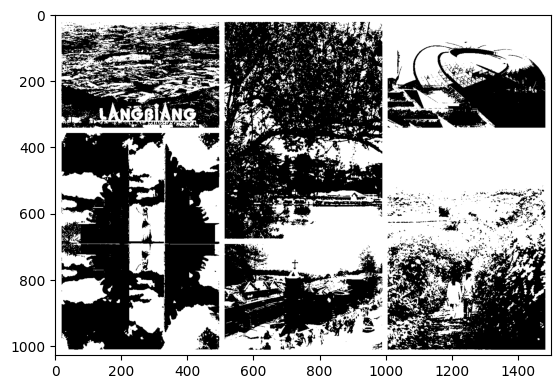

In [8]:
from PIL import Image
import numpy as np  
import imageio.v2 as iio 
import scipy.ndimage as nd  
import matplotlib.pylab as plt
from skimage.filters.thresholding import threshold_otsu

data = Image.open('dalat.jpg').convert('L')
a = np.asarray(data)
#performing Otsu's thresholding 
thres = threshold_otsu(a)

#pixels with intensity greater than threshold are kept
b = a > thres

b = Image.fromarray(b)

plt.imshow(b)
plt.show()

2.1.2 Phương pháp Adaptive Thresholding

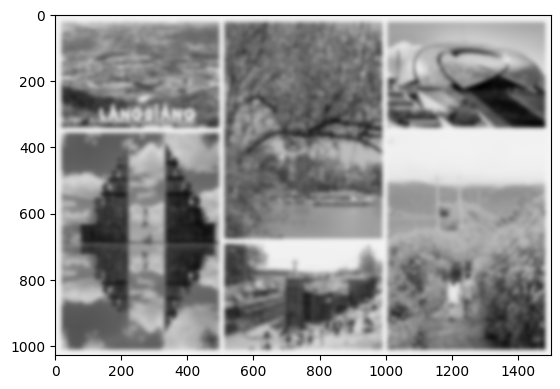

In [9]:
from PIL import Image
import numpy as np  
import imageio.v2 as iio 
import scipy.ndimage as nd  
import matplotlib.pylab as plt
from skimage.filters import threshold_local

data = Image.open('dalat.jpg').convert('L')

a = np.asarray(data)
# performing local thresholding
b = threshold_local (a, 39, offset=10)

b = Image.fromarray(b)

plt.imshow(b)
plt.show()

2.2 Phân vùng theo region

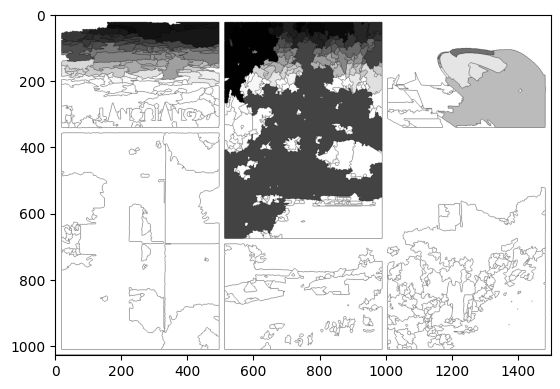

In [10]:
import cv2 
from PIL import Image 
import numpy as np  
import imageio.v2 as iio 
import scipy.ndimage as nd  
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

# open the image and coverting it to grayscale
data = cv2.imread('dalat.jpg')
# converting image from color to grayscale
a = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
#thresholding the image to obtain cell pixels
thresh, b1 = cv2.threshold(a, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
# since Otsu's method has over segmented the image 
# erosion operation is performed
b2 = cv2.erode(b1, None, iterations = 2)
# distance transform is performed
dist_trans = cv2.distanceTransform(b2, 2, 3)
# thresholding the distance transform image to obtain
# pixels that are foreground
thresh, dt = cv2.threshold(dist_trans, 1, 255, cv2.THRESH_BINARY)
# performing labeling
labelled, ncc = label(dt)
# labelled is converted to 32-bit integer
labelled = labelled.astype(np.int32)
# performing watershed 
cv2.watershed(data, labelled)
b = Image.fromarray(labelled)

plt.imshow(b)
plt.show()

2.3 Biến đổi đối tượng trong ảnh

2.3.1 Sử dụng binary_dilation

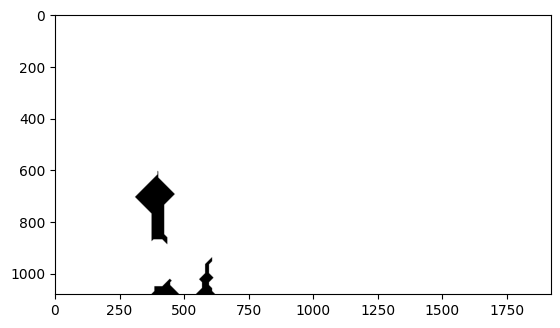

In [11]:
import cv2 
from PIL import Image 
import numpy as np  
import imageio.v2 as iio 
import scipy.ndimage as nd  
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

#opening the image and coverting it to grayscale 
data = Image.open('city.gif').convert('L')
b = nd.binary_dilation(data, iterations=50)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()

2.3.2 Sử dụng binary_opening

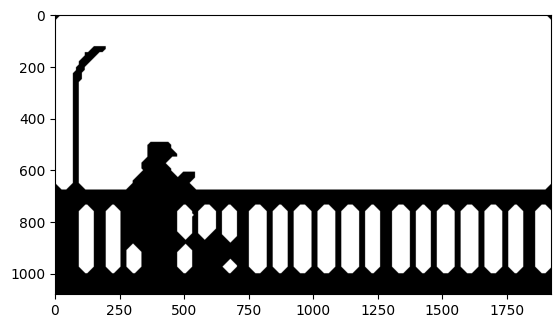

In [12]:
import cv2 
from PIL import Image 
import numpy as np  
import imageio.v2 as iio 
import scipy.ndimage as nd  
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

#opening the image and coverting it to grayscale 
data = Image.open('city.gif').convert('L')
#defining the structuring element
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_opening(data, structure=s, iterations=25)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()

2.3.3 Sử dụng binary_erosion

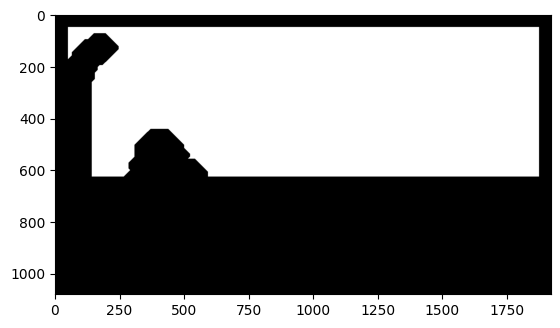

In [15]:
import cv2 
from PIL import Image 
import numpy as np  
import imageio.v2 as iio 
import scipy.ndimage as nd  
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

#opening the image and coverting it to grayscale 
data = Image.open('city.gif').convert('L')
#defining the structuring element
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_erosion(data, structure=s, iterations=50)
c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()

2.3.4 Sử dụng binary_closing

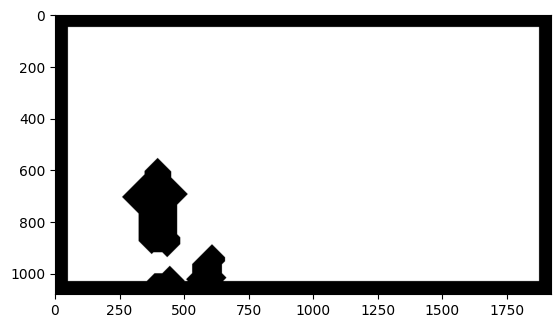

In [2]:
import cv2 
from PIL import Image 
import numpy as np  
import imageio.v2 as iio 
import scipy.ndimage as nd  
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

#opening the image and coverting it to grayscale 
data = Image.open('city.gif').convert('L')
#defining the structuring element
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_closing(data, structure=s, iterations=50)
c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()

3. BÀI TẬP

1

(1029, 1500, 3)


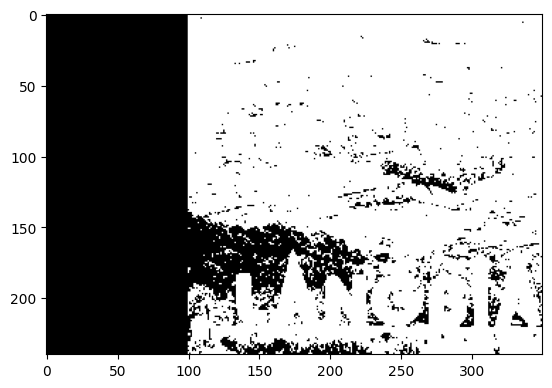

In [22]:
from PIL import Image 
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt
from skimage.filters.thresholding import threshold_otsu

data = iio.imread('dalat.jpg')
bmg = data[100:340, 100:450]
tt = nd.shift(bmg, (0, 100, 0))
a = np.array(tt)
g = np.mean(a, axis=2).astype(np.uint8)
thres = threshold_otsu(g)
b = g > (0.3 * 255)
b = (b * 255).astype(np.uint8)
print(data.shape)
plt.imshow(b, cmap='gray')
plt.show()
iio.imsave("lang_biang.jpg", b)

2

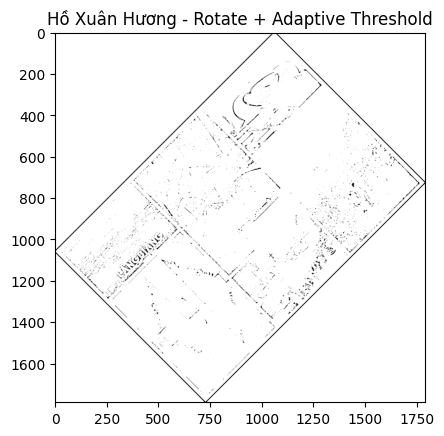

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_local
from scipy.ndimage import rotate

# Mở ảnh grayscale
img = Image.open('dalat.jpg').convert('L')
a = np.array(img)

# Xoay ảnh 45 độ
rotated = rotate(a, angle=45, reshape=True)
# Adaptive threshold với block_size=35, offset=60
thresh = threshold_local(rotated, block_size=35, offset=60)
binary = rotated > thresh

result = Image.fromarray(binary.astype(np.uint8) * 255)
result.save('ho_xuan_huong.jpg')
plt.imshow(result, cmap='gray')
plt.title('Hồ Xuân Hương - Rotate + Adaptive Threshold')
plt.show()


3

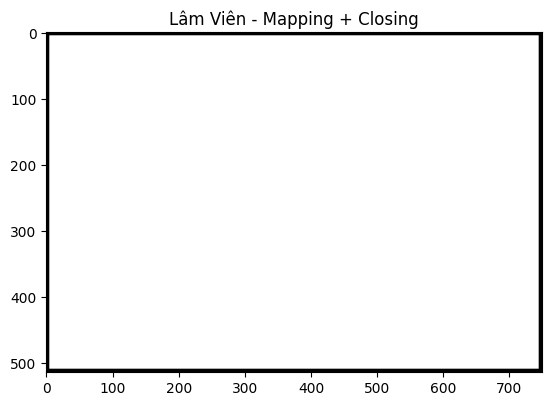

In [17]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_closing

img = Image.open('dalat.jpg').convert('L')
a = np.array(img)

scale = 0.5
mapped = np.array(Image.fromarray(a).resize(
    (int(a.shape[1]*scale), int(a.shape[0]*scale))))

# Structuring element và Binary Closing
s = np.array([[0,1,0],[1,1,1],[0,1,0]])
closed = binary_closing(mapped, structure=s, iterations=5)

result = Image.fromarray(closed.astype(np.uint8) * 255)
result.save('quan_truong_lam_vien.jpg')
plt.imshow(result, cmap='gray')
plt.title('Lâm Viên - Mapping + Closing')
plt.show()


4

Chọn chức năng:
1. Rotate
2. Scale
3. Shift
4. Adaptive_thresholding
5. Binary_dilation
6. Binary_erosion
7. Otsu


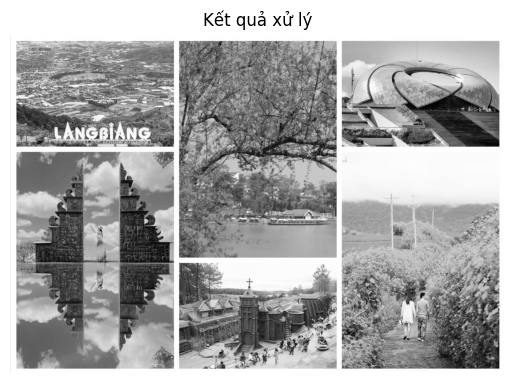

In [20]:
def geometric_transformation(img, option):
    from scipy.ndimage import rotate, shift, zoom
    if option == 'Rotate':
        return rotate(img, 45, reshape=True)
    elif option == 'Scale':
        return np.array(Image.fromarray(img).resize((img.shape[1]//2, img.shape[0]//2)))
    elif option == 'Shift':
        return shift(img, shift=(0, 100))
    else:
        return img

def segment(img, option):
    from skimage.filters import threshold_local, threshold_otsu
    from scipy.ndimage import binary_closing, binary_dilation, binary_erosion

    if option == 'Adaptive_thresholding':
        thresh = threshold_local(img, block_size=35, offset=60)
        return img > thresh
    elif option == 'Binary_dilation':
        return binary_dilation(img)
    elif option == 'Binary_erosion':
        return binary_erosion(img)
    elif option == 'Otsu':
        thresh = threshold_otsu(img)
        return img > thresh
    else:
        return img

img = np.array(Image.open('dalat.jpg').convert('L'))

print("Chọn chức năng:")
print("1. Rotate\n2. Scale\n3. Shift\n4. Adaptive_thresholding\n5. Binary_dilation\n6. Binary_erosion\n7. Otsu")

choices = input("Nhập lựa chọn (cách nhau bằng dấu cách nếu 2 chức năng): ").split()

for ch in choices:
    if ch in ['Rotate', 'Scale', 'Shift']:
        img = geometric_transformation(img, ch)
    else:
        img = segment(img, ch)

# Hiển thị kết quả
result = Image.fromarray((img.astype(np.uint8) * 255) if img.dtype == bool else img)
plt.imshow(result, cmap='gray')
plt.axis('off')
plt.title("Kết quả xử lý")
plt.show()
